# Part IA Computing: Michaelmas Term
## Exercises 11.1, 11.2 and 11.3

Edwin Bahrami Balani ([`eb677`](mailto:eb677@cam.ac.uk))

> ## Exercise 11.1
> 
> Determine by operating counting the complexity of:
> 
> 1. Dot product between two vectors
> 1. Matrix-vector product
> 1. Matrix-matrix product
> 
> for vectors of length $n$ and matrices of size $n \times n$. (This is a reasoning exercise - you do not need to write a program.)
> 
> 
> ### Optional
> 
> Test the complexity experimentally with your own functions for performing the operations, and
> with the NumPy 'vectorised' equivalents.

1. Dot product: $3n$ array accesses ($2n$ for input and $n$ for output), $n$ operations $\Rightarrow$ complexity is $O(n)$
2. Matrix-vector product: $2n^2 + n$ array accesses, $n^2$ operations $\Rightarrow$ complexity is $O(n^2)$
3. Matrix-matrix product: $(n+1)^2$

In [50]:
# Part IA Computing: Michaelmas Term
# Edwin Bahrami Balani (eb677@cam.ac.uk)

# Exercise 11.1
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Create array of problem sizes we want to test (powers of 2)
N = np.arange(0,20)
# Create an array of random numbers
x = np.random.rand(N[-1])

# Time fact_recur on arrays of different lengths
times = []

def dot(u, v):
    return sum(a*b for a,b in zip(u,v))

def mvp(m, v):
    out = np.empty(m.shape[0])
    if m.shape[1] != len(v):
        raise ValueError("Dimensions incorrect")
    for i in range(m.shape[0]):
        out[i] = dot(m[i], v)
    return out

def mmp(a, b):
    dims = ( min(a.shape[0], b.shape[1]) , min(b.shape[0], a.shape[1]) )
    out = np.empty(dims)
    for i in range(dims[0]):
        for j in range(dims[1]):
            out[i,j] = sum(a*b for a,b in zip(a[i,:], b[:,j]))
    return out
            
def mmp_alt(a, b):
    pass


A = np.random.randint(0, 10, (7, 3))
B = np.random.randint(0, 10, (3, 3))
c = np.random.randint(0, 10, 3)

#print(A, c, sep='\n')
#print(wolframify(str(A)), '*', wolframify(str(c)))
#print(mvp(A, c))

def wolframify(s):
    if type(s) is not str:
        s = str(s)
    return s.replace('  ',' ').replace('[ ','[').replace(
                                    ']\n', '},').replace(
                                    '[', '{').replace(
                                    ']', '}').replace(
                                    ', ', ',').replace(
                                    ' ', ',')

#print(A, B, sep='\n')
#print(wolframify(str(A)), '*', wolframify(str(B)))
#print()
#print(mmp(A, B))



# Doesn't work
# from functools import wraps
# def timer(func):
#     @wraps(func)
#     def wrapper(*args, times=[], n=100, r=30):
#         t = get_ipython().magic("timeit -n {} -r {} -o {}({})".format(n, r, func.__name__,
#         times.append(t.best)
#         return times
#     return wrapper
# 
# dot_timer = timer(dot)
# mvp_timer = timer(mvp)
# mmp_timer = timer(mmp)

dot_times, mvp_times, mmp_times = [], [], []
def lucas(m, n, limit=10):
    i = 0
    while i < limit:
        m, n = (n, m+n)
        yield n
        i += 1
    raise StopIteration

N = np.array(list(lucas(10,15,6)))
N = np.arange(20, 141, 20)
print(' '.join(str(i) for i in N))
for n in N:
    a = np.random.randint(0, 100, n)
    b = np.random.randint(0, 100, n)
    #print(a, b, dot(a,b), sep='\n')
    #print(wolframify(a), '*', wolframify(b), '==', wolframify(dot(a,b)))
    C = np.random.randint(0, 100, (n, n))
    D = np.random.randint(0, 100, (n, n))
    #print(a, b, C, D, sep='\n')
    #dot_times = dot_timer(a, b, times=dot_times)
    t = %timeit -n 10 -r 3 -o -q dot(a, b)
    dot_times.append(t.best)
    t = %timeit -n 10 -r 3 -o -q mvp(C, b)
    mvp_times.append(t.best)
    t = %timeit -n 10 -r 3 -o -q mmp(C, D)
    mmp_times.append(t.best)
    #mvp_times = mvp_timer(C, a, times=mvp_times)
    #mmp_times = mmp_timer(C, D, times=mmp_times)
    print(n, end=' ')
    
#for n in N:
#    t = %timeit -n100 -r100 -o -q fact_recur(n)
#    times.append(t.best)
#print(dot_times)

20 40 60 80 100 120 140
20 40 60 80 100 120 140 

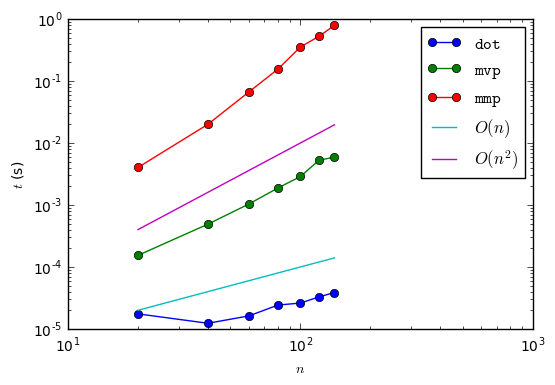

In [51]:
# np.save("dot_times2", dot_times)
# np.save("mvp_times2", mvp_times)
# np.save("mmp_times2", mmp_times)
# with open('arange2.txt', 'w') as f:
#     f.write(str(N))


# Plot timings
plt.loglog(N, dot_times, marker='o', label='$\mathtt{dot}$')
plt.loglog(N, mvp_times, marker='o', label='$\mathtt{mvp}$')
plt.loglog(N, mmp_times, marker='o', label='$\mathtt{mmp}$')
# Show reference line of O(n)
plt.loglog(N, 1e-6*N, label='$O(n)$')
plt.loglog(N, 1e-6*N**2, label='$O(n^2)$')

# Add labels
plt.xlabel('$n$')
plt.ylabel('$t$ (s)')
plt.legend(loc=0);

> ## Exercise 11.2
> 
> For the recursive factorial algorithm in Activity 04, determine the algorithmic complexity by inspecting your implementation of the algorithm. Test this against numerical experiments.

In [32]:
# Part IA Computing: Michaelmas Term
# Edwin Bahrami Balani (eb677@cam.ac.uk)

# Exercise 11.2
%matplotlib inline
from math import factorial
import numpy as np
import matplotlib.pyplot as plt

def fact_recur(n):
    if n < 0: # naughty! factorial not defined
        return 666
    if n == 0:
        return 1
    return n*fact_recur(n-1)

$n-1$ multiplications, $n-1$ subtractions $\Rightarrow O(n)$

In [ ]:
# Create array of problem sizes we want to test (powers of 2)
N = np.arange(0,20)
# Create an array of random numbers
x = np.random.rand(N[-1])

# Time fact_recur on arrays of different lengths
times = []


for n in N:
    t = %timeit -n100 -r100 -o -q fact_recur(n)
    times.append(t.best)

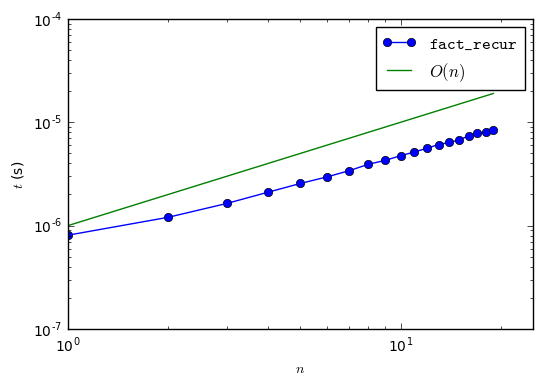

In [34]:
# Plot timings
plt.loglog(N, times, marker='o', label='$\mathtt{fact\_recur}$')

# Show reference line of O(n)
plt.loglog(N, 1e-6*N, label='$O(n)$')

# Add labels
plt.xlabel('$n$')
plt.xlim(0, 25)
plt.ylabel('$t$ (s)')
plt.legend(loc=0);

> ## Exercise 11.3
> 
> Determine experimentally the complexity of computing the determinant of a matrix. You can generate an $n \times n$ matrix using:
> 
> ```python
> n = 100
> A = np.random.rand(n, n)
> ```
> 
> and the determinant can be computed by:
> 
> ```python
> det = np.linalg.slogdet(A)
> ```
> 
> Be sure that you test for sufficiently large $n$ to get into the 'large' $n$ regime. Use a log-log scale for
your plot.

In [55]:
# Part IA Computing: Michaelmas Term
# Edwin Bahrami Balani (eb677@cam.ac.uk)

# Exercise 11.3
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def lucas(m, n, limit=10):
    i = 0
    while i < limit:
        m, n = (n, m+n)
        yield n
        i += 1
    raise StopIteration

N = np.array(list(lucas(5, 7, 12)))
times = []
for n in N:
    print(n, end=' ')
    A = np.random.rand(n, n)
    time = %timeit -q -n5 -o det = np.linalg.slogdet(A)
    times.append(time.best)

12 19 31 50 81 131 212 343 555 898 1453 2351 

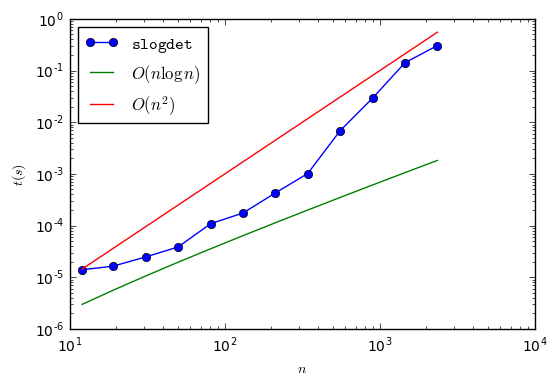

In [56]:
plt.loglog(N, times, marker='o', label='$\mathtt{slogdet}$')
plt.loglog(N, 1e-7*N*np.log(N), label='$O(n\log\, n)$')
plt.loglog(N, 1e-7*N**2, label='$O(n^2)$')
plt.xlabel('$n$')
plt.ylabel('$t (s)$')
plt.legend(loc=0);